# Weather data

In [1]:
# Import Meteostat library

from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily, Hourly, Stations


# Get nearby weather stations
stations = Stations()
stations = stations.nearby(-34.630835,	-58.391528)
station = stations.fetch(1)

# Print DataFrame
station

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end,distance
id,,,,,,,,,,,,,,,,
87582,Aeroparque Bs. As. Aerodrome,AR,C,87582,SABE,-34.5667,-58.4167,6.0,America/Argentina/Buenos_Aires,1973-01-01,2024-02-24,1973-01-01,2024-12-29,1973-01-01,2022-01-01,7494.429818


In [2]:
# Set time period
start = datetime(2022, 12, 1)
end = datetime(2022, 12, 2, 23, 59)

# Create Point for Buenos Aires
location = Point(-34.5667, -54.4167, 6)

# Get daily data
#data = Daily(location, start, end)
#data = data.fetch()


# Get hourly data
start = datetime(2017, 1, 1)
end = datetime(2022, 12, 31, 23, 59)

# Get hourly data
data = Hourly(location, start, end)
data = data.fetch()




In [3]:
data

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
time,,,,,,,,,,,
2017-01-01 00:00:00,24.7,22.6,88.0,NaN,NaN,88.0,5.4,NaN,1005.0,NaN,NaN
2017-01-01 01:00:00,22.8,21.3,91.0,NaN,NaN,39.0,7.2,NaN,1005.6,NaN,NaN
2017-01-01 02:00:00,22.6,21.2,92.0,NaN,NaN,48.0,4.3,NaN,1005.5,NaN,NaN
2017-01-01 03:00:00,22.5,21.8,96.0,NaN,NaN,22.0,3.2,NaN,1004.7,NaN,NaN
2017-01-01 04:00:00,21.3,20.5,95.0,NaN,NaN,68.0,2.2,NaN,1005.6,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,24.5,15.7,58.0,0.0,NaN,156.0,17.6,NaN,1013.8,NaN,1.0
2022-12-31 20:00:00,23.6,15.6,61.0,0.0,NaN,151.0,17.3,NaN,1013.8,NaN,1.0
2022-12-31 21:00:00,22.4,17.3,73.0,0.0,NaN,145.0,16.6,NaN,1013.7,NaN,1.0


In [4]:
data.describe()

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
count,49871.000000,49862.000000,49862.000000,17486.000000,0.0,47205.000000,49865.000000,0.0,49020.000000,0.0,4847.00000
mean,16.613385,12.685338,79.770386,0.134856,NaN,158.202521,10.400525,NaN,1015.317766,NaN,2.92779
std,6.222466,5.299773,16.284930,0.709036,NaN,116.021785,7.891603,NaN,6.299264,NaN,2.55233
min,-1.900000,-5.500000,17.000000,0.000000,NaN,0.000000,0.000000,NaN,990.800000,NaN,1.00000
25%,12.300000,9.000000,69.000000,0.000000,NaN,50.000000,4.700000,NaN,1011.000000,NaN,1.00000
50%,16.600000,13.000000,85.000000,0.000000,NaN,150.000000,9.400000,NaN,1015.200000,NaN,3.00000
75%,21.000000,16.700000,94.000000,0.000000,NaN,250.000000,14.800000,NaN,1019.500000,NaN,3.00000
max,39.500000,27.000000,100.000000,17.000000,NaN,360.000000,87.100000,NaN,1036.100000,NaN,18.00000


In [5]:
# Selección de atributos

weather_data = data[[
    'temp',
    'rhum',
    'prcp',
    'wspd',
    'pres',
    'coco'
]].rename(columns = {
    'temp':'w_temperatura',
    'rhum':'w_humedad_relativa',
    'prcp':'w_precipitaciones',
    'wspd':'w_velocidad_del_viento',
    'pres':'w_presion_del_aire',
    'coco':'w_codigo_del_tiempo'
})

# guardamos el datatset

weather_data.to_csv('../Datasets/weather_data.csv')


In [6]:
weather_data

,w_temperatura,w_humedad_relativa,w_precipitaciones,w_velocidad_del_viento,w_presion_del_aire,w_codigo_del_tiempo
time,,,,,,
2017-01-01 00:00:00,24.7,88.0,NaN,5.4,1005.0,NaN
2017-01-01 01:00:00,22.8,91.0,NaN,7.2,1005.6,NaN
2017-01-01 02:00:00,22.6,92.0,NaN,4.3,1005.5,NaN
2017-01-01 03:00:00,22.5,96.0,NaN,3.2,1004.7,NaN
2017-01-01 04:00:00,21.3,95.0,NaN,2.2,1005.6,NaN
...,...,...,...,...,...,...
2022-12-31 19:00:00,24.5,58.0,0.0,17.6,1013.8,1.0
2022-12-31 20:00:00,23.6,61.0,0.0,17.3,1013.8,1.0
2022-12-31 21:00:00,22.4,73.0,0.0,16.6,1013.7,1.0


In [36]:
weather_data.head(10000)

,w_temperatura,w_humedad_relativa,w_precipitaciones,w_velocidad_del_viento,w_presion_del_aire,w_codigo_del_tiempo
time,,,,,,
2017-01-01 00:00:00,24.7,88.0,NaN,5.4,1005.0,NaN
2017-01-01 01:00:00,22.8,91.0,NaN,7.2,1005.6,NaN
2017-01-01 02:00:00,22.6,92.0,NaN,4.3,1005.5,NaN
2017-01-01 03:00:00,22.5,96.0,NaN,3.2,1004.7,NaN
2017-01-01 04:00:00,21.3,95.0,NaN,2.2,1005.6,NaN
...,...,...,...,...,...,...
2018-02-21 11:00:00,21.8,93.0,NaN,5.8,1008.5,NaN
2018-02-21 12:00:00,21.9,92.0,NaN,5.4,1007.7,NaN
2018-02-21 13:00:00,22.3,82.0,NaN,9.0,1008.6,NaN


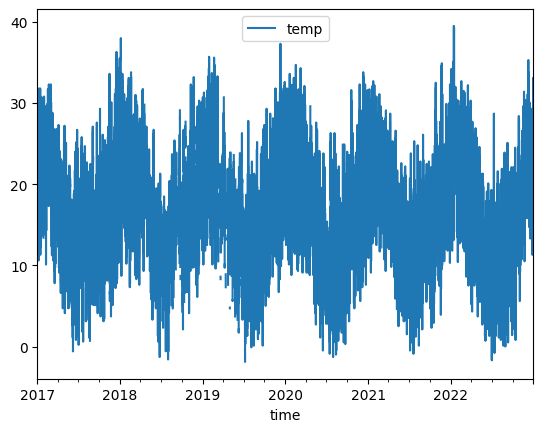

In [23]:
# Plot line chart including average, minimum and maximum temperature
data.plot(y=['temp'])
plt.show()